In [ ]:
#Model trained and testing using Lending club dataset

In [1]:
#Libraries needed for our model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [24]:
#Loading lendingclub dataset which is ready to train and test i.e cleaned and encoded (Numberical)
df = pd.read_csv("/content/encodedVersion_dataset (1).csv")
df

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,delinq_2yrs,inq_last_6mths,fico_range_low,fico_range_high
0,3600,0,13.99,123.03,2,1,1,55000.0,0,2,0,1,675,679
1,24700,0,11.99,820.28,2,1,1,65000.0,0,2,1,4,715,719
2,20000,1,10.78,432.66,1,1,1,63000.0,0,2,0,0,695,699
3,10400,1,22.45,289.91,5,3,1,104433.0,1,2,1,3,695,699
4,11950,0,13.44,405.18,2,4,3,34000.0,1,2,0,0,690,694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726637,6500,0,11.47,214.26,1,2,3,85000.0,1,1,0,2,685,689
726638,15000,0,8.39,472.75,1,3,3,135000.0,1,1,0,3,675,679
726639,3000,0,17.27,107.37,3,3,2,10000.0,0,1,0,3,665,669
726640,28000,1,24.11,807.30,5,9,1,84500.0,1,1,0,0,780,784


In [25]:
#Spliting into Features and telling which should be our Target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [26]:
#Remapping for before splitting into train/test to make XG boost model for better recognising or understanding to run model
y = y.replace({1: 0, 2: 1})

#telling the model how much for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
#Initializing ml models that is required for our work
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')}

In [ ]:
# Testing the trained model and Evaluating our models directly which is TESTING PHASE IS HERE
for name, model in models.items():
    print(f"\n Training and Testing: {name}")
    model.fit(X_train, y_train)                   # Train
    y_pred = model.predict(X_test)                # Predict
    cm = confusion_matrix(y_test, y_pred)
    # Predict probabilities or decision score for AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)
    acc = accuracy_score(y_test, y_pred)          # Provides Accuracy
    report = classification_report(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)

    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", report)
    print(f"📊 AUC Score: {auc_score:.4f}")
    print(f"Confusion Matrix for {name}:\n{cm}")


 Training and Testing: Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6424
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.78      0.72     85285
           1       0.59      0.45      0.51     60044

    accuracy                           0.64    145329
   macro avg       0.63      0.61      0.61    145329
weighted avg       0.63      0.64      0.63    145329

📊 AUC Score: 0.6895
Confusion Matrix for Logistic Regression:
[[66410 18875]
 [33096 26948]]

 Training and Testing: Decision Tree
Accuracy: 0.7490
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79     85285
           1       0.70      0.70      0.70     60044

    accuracy                           0.75    145329
   macro avg       0.74      0.74      0.74    145329
weighted avg       0.75      0.75      0.75    145329

📊 AUC Score: 0.7414
Confusion Matrix for Decision Tree:
[[67022 18263]
 [18211 41833]]

 Training and Testing: Random Forest
Accuracy

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:01:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8141
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85     85285
           1       0.79      0.74      0.77     60044

    accuracy                           0.81    145329
   macro avg       0.81      0.80      0.81    145329
weighted avg       0.81      0.81      0.81    145329

📊 AUC Score: 0.8949
Confusion Matrix for XGBoost:
[[73672 11613]
 [15408 44636]]


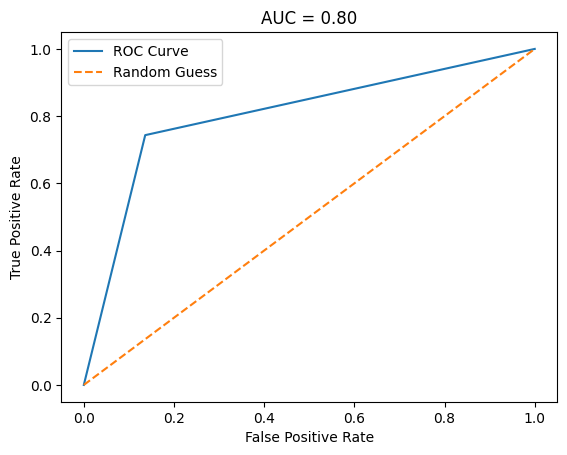

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#ROC - Receiver operating characteristic is a curve helps to visualise in a graph how well model balancing true positive and false positive
#AUC - Area under curve a score says, how well your model is good in predicting the defaulters

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'AUC = {auc:.2f}')
plt.legend()
plt.show()


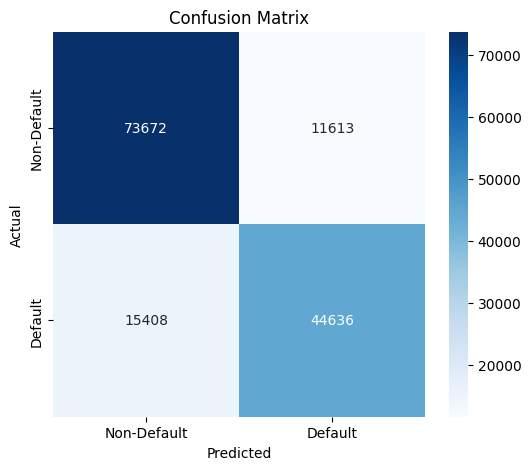

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions for visualization
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


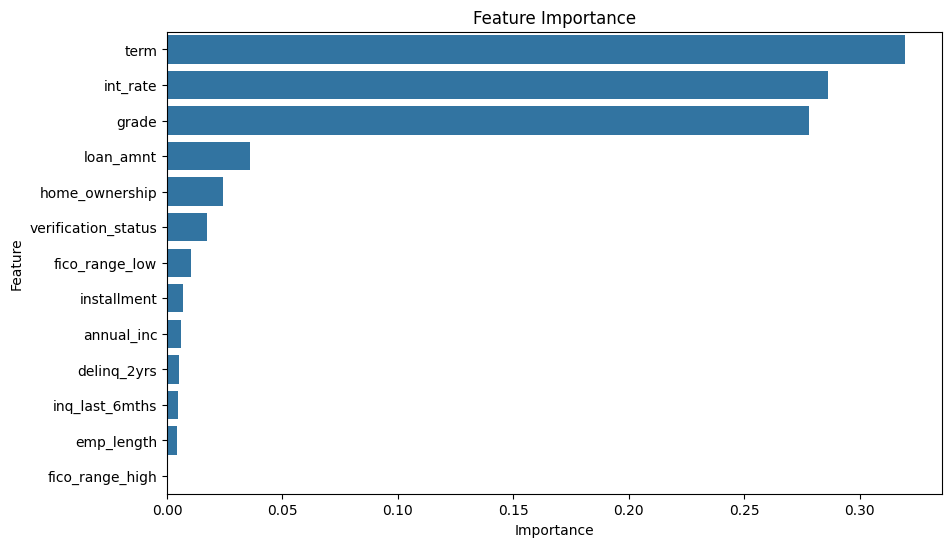

In [ ]:
import pandas as pd

# For Random Forest or XGBoost
feature_importances = model.feature_importances_
features = X_train.columns

# Create DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


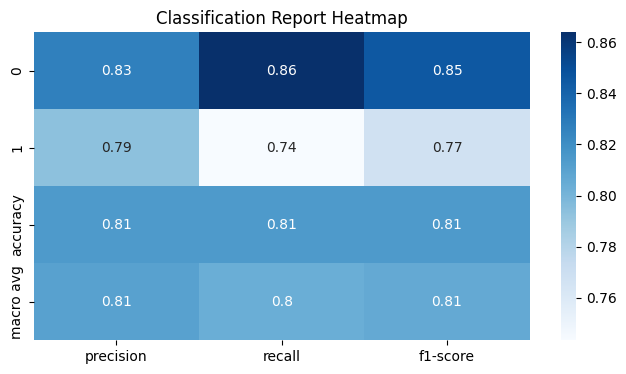

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()


In [28]:
# Statsmodels Logistic Regression
import statsmodels.api as sm
X = sm.add_constant(X)

logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.613021
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               581313
Model:                          Logit   Df Residuals:                   581300
Method:                           MLE   Df Model:                           12
Date:                Thu, 07 Aug 2025   Pseudo R-squ.:                 0.09633
Time:                        20:18:47   Log-Likelihood:            -3.5636e+05
converged:                       True   LL-Null:                   -3.9434e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
loan_amnt           -3.402e-05   2.32e-06    -14.678      0.000   -3.86e-05   -2.95e-05
te

In [ ]:
#Model trained and testing using Prosper dataset

In [29]:
#Loading Prosper dataset which is ready to train and test i.e cleaned and encoded (Numberical)
df = pd.read_csv("/content/Encoded_prosperDataset (1).csv")
df

,LoanOriginalAmount,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IncomeRange,DebtToIncomeRatio,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentDelinquencies,DelinquenciesLast7Years,InquiriesLast6Months,IsBorrowerHomeowner
0,9425.0,1,0,1422,2010,7,2,79,640.0,659.0,2.0,4.0,3.0,1
1,10000.0,1,1,188,1376,0,3,90,680.0,699.0,0.0,0.0,3.0,0
2,3001.0,1,0,4248,859,2,5,288,480.0,499.0,1.0,0.0,0.0,0
3,10000.0,1,1,329,1424,0,2,57,800.0,819.0,4.0,14.0,0.0,1
4,15000.0,1,1,3539,315,0,1,179,680.0,699.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96853,25000.0,2,1,1017,1715,0,4,201,800.0,819.0,0.0,0.0,2.0,0
96854,10000.0,1,1,2977,117,0,3,35,700.0,719.0,0.0,7.0,0.0,1
96855,10000.0,2,1,3393,367,0,2,279,700.0,719.0,0.0,0.0,1.0,1
96856,15000.0,2,0,4271,756,1,2,275,680.0,699.0,0.0,0.0,1.0,1


In [30]:
#Spliting into Features and telling which should be our Target
X = df.drop('LoanStatus', axis=1)
y = df['LoanStatus']

# Stratified split ensures balance in train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
#Initializing ml models that is required for our work
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [ ]:
# Testing the trained model and Evaluating our models directly which is TESTING PHASE IS HERE
for name, model in models.items():
    print(f"\n Training and Testing: {name}")
    model.fit(X_train, y_train)                   # Train
    y_pred = model.predict(X_test)                # Predict
    cm = confusion_matrix(y_test, y_pred)
     # Predict probabilities or decision score for AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)
    acc = accuracy_score(y_test, y_pred)          # Provides Accuracy
    report = classification_report(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)

    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", report)
    print(f"📊 AUC Score: {auc_score:.4f}")
    print(f"Confusion Matrix for {name}:\n{cm}")


 Training and Testing: Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7646
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.70      0.73      8876
           1       0.76      0.82      0.79     10496

    accuracy                           0.76     19372
   macro avg       0.77      0.76      0.76     19372
weighted avg       0.76      0.76      0.76     19372

📊 AUC Score: 0.8209
Confusion Matrix for Logistic Regression:
[[6184 2692]
 [1869 8627]]

 Training and Testing: Decision Tree
Accuracy: 0.8226
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      8876
           1       0.84      0.83      0.83     10496

    accuracy                           0.82     19372
   macro avg       0.82      0.82      0.82     19372
weighted avg       0.82      0.82      0.82     19372

📊 AUC Score: 0.8226
Confusion Matrix for Decision Tree:
[[7262 1614]
 [1822 8674]]

 Training and Testing: Random Forest
Accuracy: 0.8671

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:04:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8784
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.86      8876
           1       0.86      0.93      0.89     10496

    accuracy                           0.88     19372
   macro avg       0.88      0.87      0.88     19372
weighted avg       0.88      0.88      0.88     19372

📊 AUC Score: 0.9477
Confusion Matrix for XGBoost:
[[7233 1643]
 [ 712 9784]]


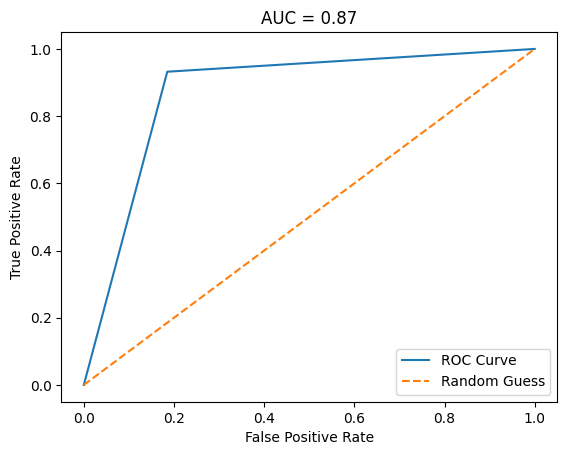

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#ROC - Receiver operating characteristic is a curve helps to visualise in a graph how well model balancing true positive and false positive
#AUC - Area under curve a score says, how well your model is good in predicting the defaulters

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'AUC = {auc:.2f}')
plt.legend()
plt.show()


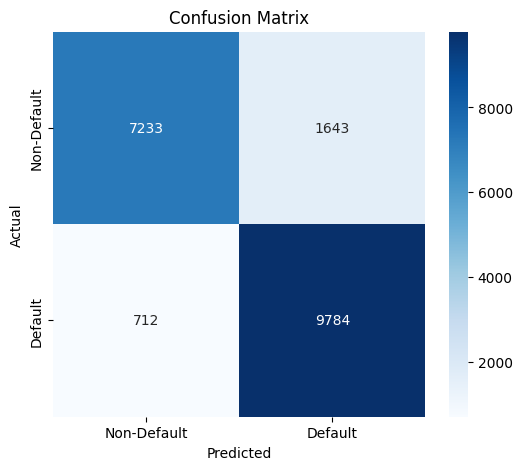

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions for visualization
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


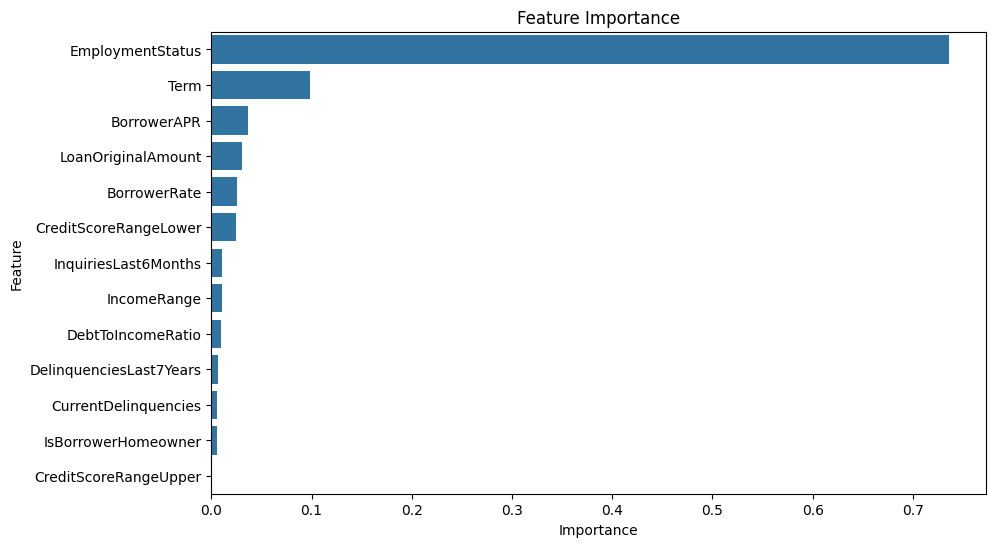

In [ ]:
import pandas as pd

# For Random Forest or XGBoost
feature_importances = model.feature_importances_
features = X_train.columns

# Create DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


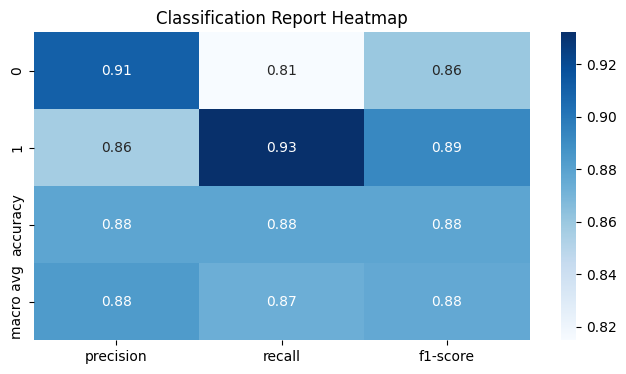

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()


In [32]:
# Statsmodels Logistic Regression
import statsmodels.api as sm
X = sm.add_constant(X)

logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.531162
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             LoanStatus   No. Observations:                77486
Model:                          Logit   Df Residuals:                    77473
Method:                           MLE   Df Model:                           12
Date:                Thu, 07 Aug 2025   Pseudo R-squ.:                  0.2298
Time:                        20:19:16   Log-Likelihood:                -41158.
converged:                       True   LL-Null:                       -53438.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
LoanOriginalAmount       7.584e-05    1.7e-06     44.540      0.000    7.25e-05   